# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [2]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [3]:
# Note the way each array is printed:
a,b,c,d

(array([ 0.,  0.,  0.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[5, 6, 5, 5],
         [4, 3, 1, 4],
         [6, 5, 1, 8]],
 
        [[9, 6, 5, 2],
         [2, 4, 2, 9],
         [1, 9, 3, 6]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [4]:
c[1,2,3]

6

In [ ]:
## Arithmetic in arrays is element wise

In [5]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [6]:
c = a-b
c

array([20, 29, 38, 47])

In [7]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [8]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [9]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [10]:
a[2:5]

array([ 4,  9, 16])

In [11]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [12]:
b = np.random.randint(1,100,(4,4))

In [13]:
b

array([[96, 55, 81, 34],
       [68, 46, 92, 50],
       [62, 57, 64, 98],
       [40, 40, 94, 49]])

In [14]:
# Guess the output
print(b[2,3])
print(b[0,0])


98
96


In [15]:
b[0:3,1],b[:,1]

(array([55, 46, 57]), array([55, 46, 57, 40]))

In [16]:
b[1:3,:]

array([[68, 46, 92, 50],
       [62, 57, 64, 98]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [75]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [20]:
# Index, columns, underlying numpy data
df.T
df

,A,B,C,D
2014-01-01,0.466955,0.646056,-1.300922,-0.236505
2014-01-02,-0.892842,0.309139,0.836046,1.986161
2014-01-03,-0.419882,0.246688,0.841023,-0.274963
2014-01-04,0.412070,1.070078,-0.692093,1.041434
2014-01-05,1.227972,0.714362,-0.255141,-0.404909
2014-01-06,-0.737250,0.161210,-1.258907,-0.068100


In [21]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [22]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [23]:
df.head()

,A,B,C,D
2014-01-01,0.466955,0.646056,-1.300922,-0.236505
2014-01-02,-0.892842,0.309139,0.836046,1.986161
2014-01-03,-0.419882,0.246688,0.841023,-0.274963
2014-01-04,0.412070,1.070078,-0.692093,1.041434
2014-01-05,1.227972,0.714362,-0.255141,-0.404909


In [24]:
df.tail()

,A,B,C,D
2014-01-02,-0.892842,0.309139,0.836046,1.986161
2014-01-03,-0.419882,0.246688,0.841023,-0.274963
2014-01-04,0.412070,1.070078,-0.692093,1.041434
2014-01-05,1.227972,0.714362,-0.255141,-0.404909
2014-01-06,-0.737250,0.161210,-1.258907,-0.068100


In [25]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [26]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.009504,0.524589,-0.304999,0.340520
std,0.826103,0.347568,0.966383,0.962687
min,-0.892842,0.161210,-1.300922,-0.404909
25%,-0.657908,0.262301,-1.117203,-0.265349
50%,-0.003906,0.477598,-0.473617,-0.152302
75%,0.453234,0.697285,0.563249,0.764051
max,1.227972,1.070078,0.841023,1.986161


In [28]:
df.sort_values(by='B')


,A,B,C,D
2014-01-06,-0.737250,0.161210,-1.258907,-0.068100
2014-01-03,-0.419882,0.246688,0.841023,-0.274963
2014-01-02,-0.892842,0.309139,0.836046,1.986161
2014-01-01,0.466955,0.646056,-1.300922,-0.236505
2014-01-05,1.227972,0.714362,-0.255141,-0.404909
2014-01-04,0.412070,1.070078,-0.692093,1.041434


### Selection

In [29]:
df[['A','B']]

,A,B
2014-01-01,0.466955,0.646056
2014-01-02,-0.892842,0.309139
2014-01-03,-0.419882,0.246688
2014-01-04,0.412070,1.070078
2014-01-05,1.227972,0.714362
2014-01-06,-0.737250,0.161210


In [30]:
df[0:3]

,A,B,C,D
2014-01-01,0.466955,0.646056,-1.300922,-0.236505
2014-01-02,-0.892842,0.309139,0.836046,1.986161
2014-01-03,-0.419882,0.246688,0.841023,-0.274963


In [35]:
# By label
df.loc[dates[0]]

A    0.466955
B    0.646056
C   -1.300922
D   -0.236505
Name: 2014-01-01 00:00:00, dtype: float64

In [32]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-01,0.466955,0.646056
2014-01-02,-0.892842,0.309139
2014-01-03,-0.419882,0.246688
2014-01-04,0.412070,1.070078
2014-01-05,1.227972,0.714362
2014-01-06,-0.737250,0.161210


In [33]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,0.309139
2014-01-03,0.246688
2014-01-04,1.070078


In [36]:
# Fast access to scalar
df.at[dates[1],'B']

0.30913902073701782

In [47]:
# iloc provides integer locations similar to np style
df.iloc[3:,1:2]

,B
2014-01-04,1.070078
2014-01-05,0.714362
2014-01-06,0.161210


### Boolean Indexing

In [39]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-02,-0.892842,0.309139,0.836046,1.986161
2014-01-03,-0.419882,0.246688,0.841023,-0.274963
2014-01-06,-0.737250,0.161210,-1.258907,-0.068100


### Setting

In [40]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [41]:
df_posA

,A,B,C,D
2014-01-01,0.466955,0.646056,-1.300922,-0.236505
2014-01-02,0.892842,-0.309139,-0.836046,-1.986161
2014-01-03,0.419882,-0.246688,-0.841023,0.274963
2014-01-04,0.412070,1.070078,-0.692093,1.041434
2014-01-05,1.227972,0.714362,-0.255141,-0.404909
2014-01-06,0.737250,-0.161210,1.258907,0.068100


In [42]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [43]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [44]:
df['F'] = s1

In [45]:
df

,A,B,C,D,F
2014-01-01,0.466955,0.646056,-1.300922,-0.236505,NaN
2014-01-02,-0.892842,0.309139,0.836046,1.986161,1.0
2014-01-03,-0.419882,0.246688,0.841023,-0.274963,2.0
2014-01-04,0.412070,1.070078,-0.692093,1.041434,3.0
2014-01-05,1.227972,0.714362,-0.255141,-0.404909,4.0
2014-01-06,-0.737250,0.161210,-1.258907,-0.068100,5.0


### Missing Data

In [48]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [49]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [50]:
df1

,A,B,C,D,F,E
2014-01-01,0.466955,0.646056,-1.300922,-0.236505,NaN,1.0
2014-01-02,-0.892842,0.309139,0.836046,1.986161,1.0,1.0
2014-01-03,-0.419882,0.246688,0.841023,-0.274963,2.0,NaN
2014-01-04,0.412070,1.070078,-0.692093,1.041434,3.0,NaN


In [51]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [52]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,0.009504,0.524589,-0.304999,0.340520,3.000000
std,0.826103,0.347568,0.966383,0.962687,1.581139
min,-0.892842,0.161210,-1.300922,-0.404909,1.000000
25%,-0.657908,0.262301,-1.117203,-0.265349,2.000000
50%,-0.003906,0.477598,-0.473617,-0.152302,3.000000
75%,0.453234,0.697285,0.563249,0.764051,4.000000
max,1.227972,1.070078,0.841023,1.986161,5.000000


In [53]:
df.mean(),df.mean(1) # Operation on two different axes

(A    0.009504
 B    0.524589
 C   -0.304999
 D    0.340520
 F    3.000000
 dtype: float64, 2014-01-01   -0.106104
 2014-01-02    0.647701
 2014-01-03    0.478573
 2014-01-04    0.966298
 2014-01-05    1.056457
 2014-01-06    0.619391
 Freq: D, dtype: float64)

### Applying functions

In [54]:
df

,A,B,C,D,F
2014-01-01,0.466955,0.646056,-1.300922,-0.236505,NaN
2014-01-02,-0.892842,0.309139,0.836046,1.986161,1.0
2014-01-03,-0.419882,0.246688,0.841023,-0.274963,2.0
2014-01-04,0.412070,1.070078,-0.692093,1.041434,3.0
2014-01-05,1.227972,0.714362,-0.255141,-0.404909,4.0
2014-01-06,-0.737250,0.161210,-1.258907,-0.068100,5.0


In [55]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,0.466955,0.646056,-1.300922,-0.236505,NaN
2014-01-02,-0.425887,0.955195,-0.464876,1.749657,1.0
2014-01-03,-0.845769,1.201884,0.376147,1.474693,3.0
2014-01-04,-0.433700,2.271962,-0.315946,2.516127,6.0
2014-01-05,0.794272,2.986324,-0.571087,2.111218,10.0
2014-01-06,0.057022,3.147534,-1.829994,2.043118,15.0


In [56]:
df.apply(lambda x: x.max() - x.min())

A    2.120814
B    0.908868
C    2.141945
D    2.391070
F    4.000000
dtype: float64

In [57]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [58]:
np.random.randn(10,4)

array([[ 1.64521403, -0.5041834 , -0.81046745,  1.50452157],
       [ 0.08648005, -1.2064934 , -1.31739315,  0.04868214],
       [ 1.05497074,  0.95774048, -1.48206397, -0.53616642],
       [-0.22464427,  1.30838873, -0.43972134,  3.04574421],
       [ 0.18598869, -0.55864863, -1.17993901, -1.06463345],
       [ 0.92787901,  1.66627156,  1.10950019, -1.61466146],
       [-0.34210137, -1.00544616,  1.30163412, -0.32949895],
       [ 0.74641166, -0.58692794, -1.42800463,  0.25908   ],
       [ 0.79351287,  0.29835607, -0.0286094 , -1.64802375],
       [ 1.23035861, -0.65882831, -2.09168593, -1.09261849]])

In [59]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,2.071821,-1.721611,0.057404,0.794871
1,-0.426359,0.011638,-0.280894,-0.046257
2,-1.174668,0.809479,-0.065896,-0.075985
3,-0.455366,0.801329,2.636699,0.410506
4,-0.047108,0.336769,0.461122,-1.200156
5,-0.017331,0.448466,-0.658184,-0.176159
6,0.296912,1.743246,-1.506885,-1.113342
7,1.198787,-0.205891,-1.988019,0.775779
8,1.055091,0.701021,0.281446,0.390564
9,1.313239,1.046210,0.731574,0.114082


In [60]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0  2.071821 -1.721611  0.057404  0.794871
 1 -0.426359  0.011638 -0.280894 -0.046257
 2 -1.174668  0.809479 -0.065896 -0.075985,
           0         1         2         3
 3 -0.455366  0.801329  2.636699  0.410506
 4 -0.047108  0.336769  0.461122 -1.200156
 5 -0.017331  0.448466 -0.658184 -0.176159
 6  0.296912  1.743246 -1.506885 -1.113342,
           0         1         2         3
 7  1.198787 -0.205891 -1.988019  0.775779
 8  1.055091  0.701021  0.281446  0.390564
 9  1.313239  1.046210  0.731574  0.114082]

In [61]:
pd.concat(pieces)

,0,1,2,3
0,2.071821,-1.721611,0.057404,0.794871
1,-0.426359,0.011638,-0.280894,-0.046257
2,-1.174668,0.809479,-0.065896,-0.075985
3,-0.455366,0.801329,2.636699,0.410506
4,-0.047108,0.336769,0.461122,-1.200156
5,-0.017331,0.448466,-0.658184,-0.176159
6,0.296912,1.743246,-1.506885,-1.113342
7,1.198787,-0.205891,-1.988019,0.775779
8,1.055091,0.701021,0.281446,0.390564
9,1.313239,1.046210,0.731574,0.114082


In [62]:
# Also can "Join" and "Append"
df

,0,1,2,3
0,2.071821,-1.721611,0.057404,0.794871
1,-0.426359,0.011638,-0.280894,-0.046257
2,-1.174668,0.809479,-0.065896,-0.075985
3,-0.455366,0.801329,2.636699,0.410506
4,-0.047108,0.336769,0.461122,-1.200156
5,-0.017331,0.448466,-0.658184,-0.176159
6,0.296912,1.743246,-1.506885,-1.113342
7,1.198787,-0.205891,-1.988019,0.775779
8,1.055091,0.701021,0.281446,0.390564
9,1.313239,1.046210,0.731574,0.114082


### Grouping


In [63]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [64]:
df

,A,B,C,D
0,foo,one,1.964992,-0.421087
1,bar,one,1.673312,-1.466401
2,foo,two,1.229616,-1.144046
3,bar,three,-0.413725,1.353883
4,foo,two,-0.705345,-0.567351
5,bar,two,1.155579,-0.892441
6,foo,one,-0.381197,-0.675028
7,foo,three,0.951732,-0.547250


In [65]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.673312 -1.466401
    three -0.413725  1.353883
    two    1.155579 -0.892441
foo one    1.583795 -1.096115
    three  0.951732 -0.547250
    two    0.524271 -1.711397

### Reshaping

In [66]:
# You can also stack or unstack levels

In [67]:
a = df.groupby(['A','B']).sum()

In [68]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  1.673312 -0.413725  1.155579 -1.466401  1.353883 -0.892441
foo  0.791897  0.951732  0.262135 -0.548058 -0.547250 -0.855698

### Time Series


In [69]:
import pandas as pd
import numpy as np

In [70]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [71]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [72]:
ts

2014-01-01 00:00:00    240
2014-01-01 00:00:01    494
2014-01-01 00:00:02    459
2014-01-01 00:00:03    372
2014-01-01 00:00:04    322
2014-01-01 00:00:05    350
2014-01-01 00:00:06    251
2014-01-01 00:00:07     22
2014-01-01 00:00:08     61
2014-01-01 00:00:09     83
2014-01-01 00:00:10     25
2014-01-01 00:00:11    234
2014-01-01 00:00:12    492
2014-01-01 00:00:13    114
2014-01-01 00:00:14    290
2014-01-01 00:00:15    243
2014-01-01 00:00:16    427
2014-01-01 00:00:17    338
2014-01-01 00:00:18     73
2014-01-01 00:00:19    130
2014-01-01 00:00:20    156
2014-01-01 00:00:21     75
2014-01-01 00:00:22    301
2014-01-01 00:00:23    168
2014-01-01 00:00:24    421
2014-01-01 00:00:25    188
2014-01-01 00:00:26     38
2014-01-01 00:00:27     79
2014-01-01 00:00:28    392
2014-01-01 00:00:29    224
                      ... 
2014-01-01 00:01:10    391
2014-01-01 00:01:11    234
2014-01-01 00:01:12     95
2014-01-01 00:01:13    383
2014-01-01 00:01:14    125
2014-01-01 00:01:15     64
2

In [73]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    228.133333
2014-01-01 00:01:00    290.625000
Freq: T, dtype: float64

In [ ]:
# Many additional time series features
ts. #use tab

### Plotting


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

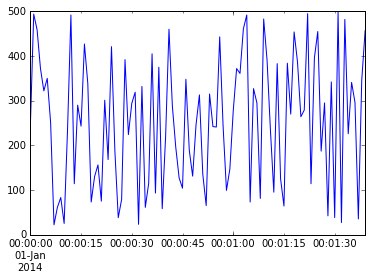

In [76]:
ts.plot()

In [77]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

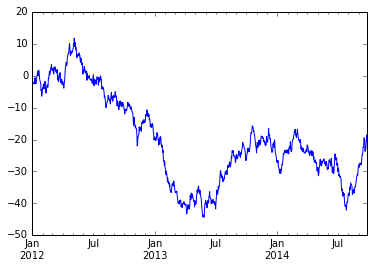

In [78]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [79]:
# Pandas plot function will print with labels as default

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

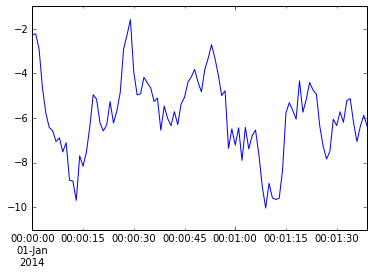

In [80]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas